In [12]:
import numpy as np
import pandas as pd
import plotly.express as px

In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)

data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data_numeric = data[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
X = data_numeric.values

In [8]:
def kmeans(X, k, max_iters=100):
    centroids = X[np.random.choice(range(X.shape[0]), size=k, replace=False)]

    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

In [11]:
centroids, labels = kmeans(X, 3)

print("Centroids:")
print(centroids)
print("Labels:")
print(labels)

Centroids:
[[5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]]
Labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


In [14]:
df = data_numeric.copy()
df['cluster'] = labels

fig = px.scatter_3d(df, x='sepal-length', y='sepal-width', z='petal-length', color='cluster', template='plotly_dark')
fig.show()

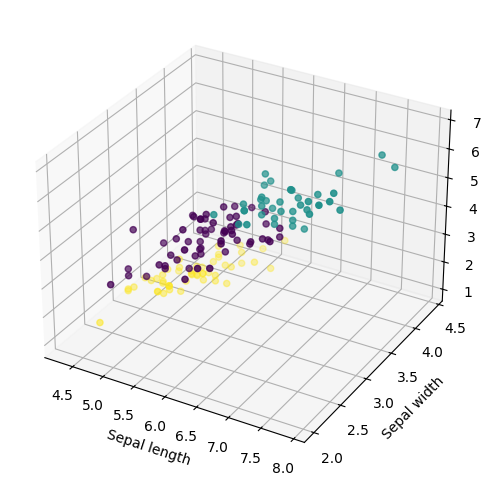

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = data_numeric.copy()
df['cluster'] = labels

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['sepal-length'], df['sepal-width'], df['petal-length'], c=df['cluster'], cmap='viridis')

ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')

plt.show()